In [11]:
import sys
import os 
import re

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [2]:
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
train = pd.read_csv('data/train.csv')

In [4]:
train.head()

,id,text,target
0,0,"\nThey were, and even if Washington might cons...",10
1,1,"We run ""SpaceNews & Views"" on our STAREACH BBS...",14
2,2,\n\n\nNot to worry. The Masons have been demo...,19
3,3,"Only Brendan McKay, or maybe ARF, would come t...",17
4,4,Help: I am running some sample problems from O...,5


In [8]:
# 결측치 확인
def checking_missing_col(df):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(df.columns):
        missing_values = sum(df[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은:{col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, df[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = checking_missing_col(train)

결측치가 존재하지 않습니다


In [9]:
# 기초 통계 분석
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9233 entries, 0 to 9232
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      9233 non-null   int64 
 1   text    9233 non-null   object
 2   target  9233 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 216.5+ KB


In [10]:
train['text']

0       \nThey were, and even if Washington might cons...
1       We run "SpaceNews & Views" on our STAREACH BBS...
2       \n\n\nNot to worry.  The Masons have been demo...
3       Only Brendan McKay, or maybe ARF, would come t...
4       Help: I am running some sample problems from O...
                              ...                        
9228    \n\nPrecisely, why not Cuba??  Why not???  The...
9229    Your Custom Resume On Disk!\n \n              ...
9230    Throughout the years of the Israel/Arab-Palest...
9231    Does anyone know if there are any devices avai...
9232    \n\n      Give ME a break, chum.  Are you tell...
Name: text, Length: 9233, dtype: object

In [18]:
# 전처리
def clean_text(texts):
    corpus = []
    for i in range(len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
        review = re.sub(r'\d+','', review)#숫자 제거
        review = review.lower() #소문자 변환
        review = re.sub(r'\s+', ' ', review) #extra space 제거
        review = re.sub(r'<[^>]+>','',review) #Html tags 제거
        review = re.sub(r'\s+', ' ', review) #spaces 제거
        review = re.sub(r"^\s+", '', review) #space from start 제거
        review = re.sub(r'\s+$', '', review) #space from the end 제거
        review = re.sub(r'_', ' ', review) #space from the end 제거
        corpus.append(review) 
    return corpus

In [20]:
train['text'] = clean_text(train['text'])

In [21]:
train.head()

,id,text,target
0,0,they were and even if washington might conside...,10
1,1,we run spacenews views on our stareach bbs a l...,14
2,2,not to worry the masons have been demonized an...,19
3,3,only brendan mckay or maybe arf would come to ...,17
4,4,help i am running some sample problems from or...,5


In [24]:
# 뉴스 그룹 비율 확인
val_count = train['target'].value_counts()

for i in range(20):
    print(f'라벨{i}인 리뷰 개수:', val_count[i])

라벨0인 리뷰 개수: 386
라벨1인 리뷰 개수: 480
라벨2인 리뷰 개수: 458
라벨3인 리뷰 개수: 467
라벨4인 리뷰 개수: 490
라벨5인 리뷰 개수: 496
라벨6인 리뷰 개수: 494
라벨7인 리뷰 개수: 493
라벨8인 리뷰 개수: 475
라벨9인 리뷰 개수: 490
라벨10인 리뷰 개수: 482
라벨11인 리뷰 개수: 488
라벨12인 리뷰 개수: 483
라벨13인 리뷰 개수: 490
라벨14인 리뷰 개수: 467
라벨15인 리뷰 개수: 515
라벨16인 리뷰 개수: 428
라벨17인 리뷰 개수: 455
라벨18인 리뷰 개수: 387
라벨19인 리뷰 개수: 309


그림 저장: label group counts


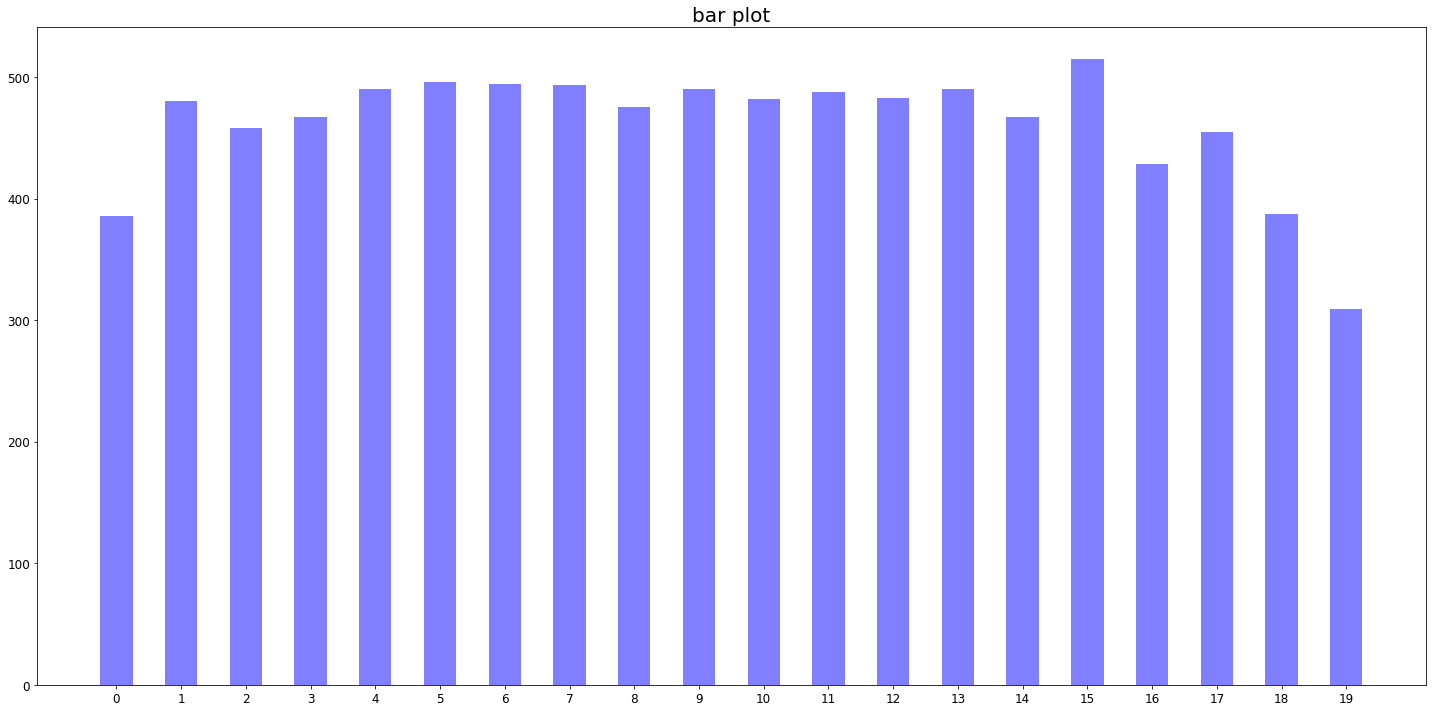

In [34]:
# 데이터 시각화
temp = train['target'].value_counts()
plt.figure(figsize=(20,10))
plt.title('bar plot', fontsize=20)
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
plt.xticks(temp.keys(), fontsize=12)
plt.show()
# save_fig('label group counts')

In [35]:
# 뉴스 text 길이 확인
str_len_mean = np.mean(train['text'].str.len())
print('뉴스의 평균 길이:', round(str_len_mean,0))

뉴스의 평균 길이: 1020.0


In [43]:
# 데이터 필터링을 위한 마스크 설정
for i in range(20):
    globals()['mask_{}'.format(i)] = (train['target'] == i)

In [46]:
train[mask_0]

,id,text,target
52,52,deleted stuff from andrew wrt which atheist my...,0
56,56,deletia in case anybody hadnt noticed frank an...,0
95,95,due to a discussion on this group some time ag...,0
113,113,no bobby stalin killed millions in the name of...,0
139,139,issued by khomeini it shouldnt be relevant to ...,0
...,...,...,...
9116,9116,wait a minute i thought you said that allah i ...,0
9138,9138,i recall a discussion i had heard years ago it...,0
9149,9149,i wonder how many atheists out there care to s...,0
9171,9171,are you saying that their was a physical adam ...,0


In [40]:
# 전체 및 그룹 집합을 설정
df_train = train['text'].copy()

for i in range(20):
    globals()['df_{}'.format(i)] = train.loc[globals()['mask_{}'.format(i)],:]['text']

In [41]:
compare = [df_0, df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12, df_13, df_14, df_15, df_16, df_17, df_18, df_19]

In [42]:
df_0

52      deleted stuff from andrew wrt which atheist my...
56      deletia in case anybody hadnt noticed frank an...
95      due to a discussion on this group some time ag...
113     no bobby stalin killed millions in the name of...
139     issued by khomeini it shouldnt be relevant to ...
                              ...                        
9116    wait a minute i thought you said that allah i ...
9138    i recall a discussion i had heard years ago it...
9149    i wonder how many atheists out there care to s...
9171    are you saying that their was a physical adam ...
9226    id like this too maybe you should post an answ...
Name: text, Length: 386, dtype: object

그림 저장: Histogram : news length


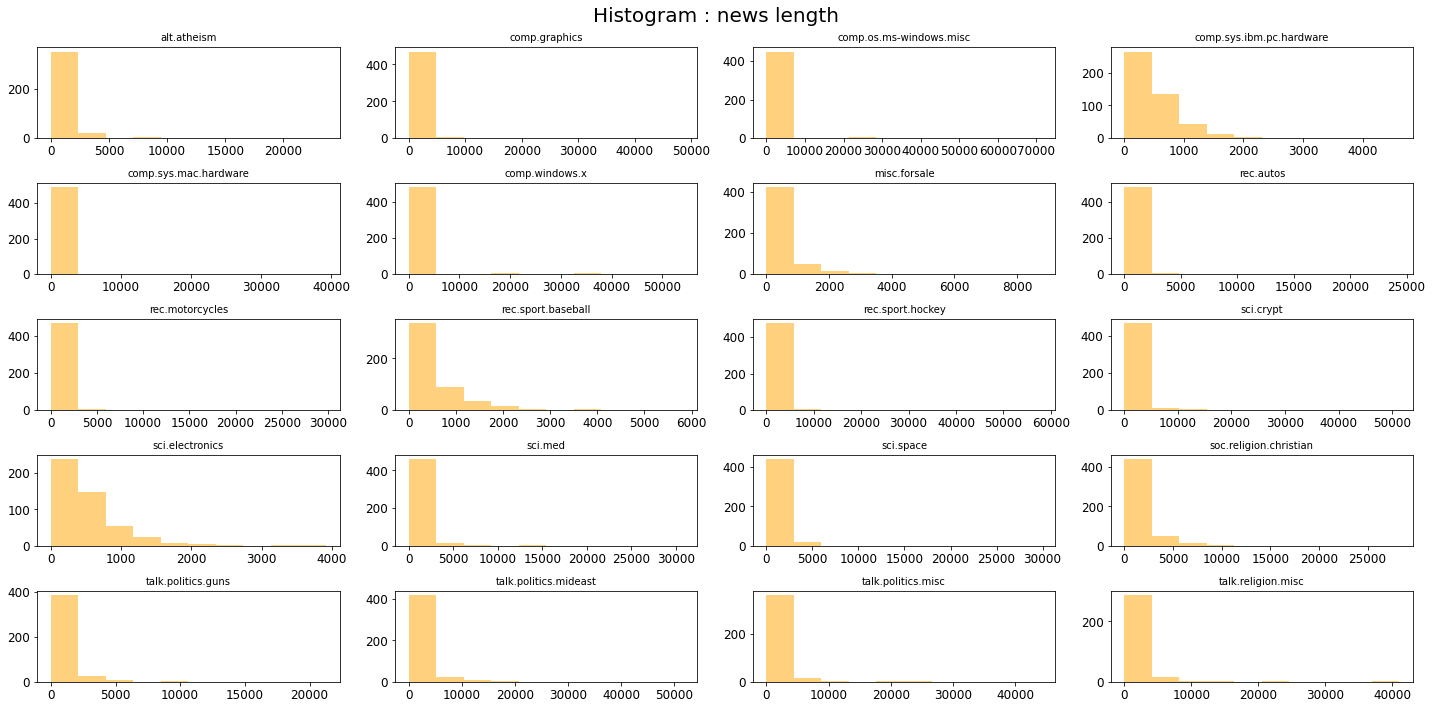

In [52]:
# 히스토그램을 사용해서 데이터 분포를 살펴봄
plt.figure(figsize=(20, 10))
plt.suptitle('Histogram : news length', fontsize=20)
name = ['alt.atheism', # 0
        'comp.graphics', # 1
        'comp.os.ms-windows.misc', # 2
        'comp.sys.ibm.pc.hardware', # 3
        'comp.sys.mac.hardware', # 4
        'comp.windows.x', # 5
        'misc.forsale', # 6
        'rec.autos', # 7
        'rec.motorcycles', # 8
        'rec.sport.baseball', # 9
        'rec.sport.hockey', # 10
        'sci.crypt', # 11
        'sci.electronics', # 12
        'sci.med', # 13
        'sci.space', # 14
        'soc.religion.christian', # 15
        'talk.politics.guns', # 16
        'talk.politics.mideast', # 17
        'talk.politics.misc', # 18
        'talk.religion.misc'] # 19

for i in range(len(compare)):
    text = compare[i]
    string_len = [len(x) for x in text]
    plt.subplot(5,4,i+1)
    plt.title(name[i], fontsize=10)
#     plt.axis([0, 50000, 0, 10])
    plt.hist(string_len, alpha=0.5, color='orange')

plt.tight_layout()
plt.show()
# save_fig('Histogram : news length')

In [53]:
# wordcloud
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import nltk
import pickle
from nltk.corpus import stopwords
from os import path
# nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/sol/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /Users/sol/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/sol/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/sol/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/sol/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/sol/nltk_data...
[nltk_data]    |   Unzi

[nltk_data]    |   Unzipping misc/perluniprops.zip.
[nltk_data]    | Downloading package pil to /Users/sol/nltk_data...
[nltk_data]    |   Unzipping corpora/pil.zip.
[nltk_data]    | Downloading package pl196x to /Users/sol/nltk_data...
[nltk_data]    |   Unzipping corpora/pl196x.zip.
[nltk_data]    | Downloading package porter_test to
[nltk_data]    |     /Users/sol/nltk_data...
[nltk_data]    |   Unzipping stemmers/porter_test.zip.
[nltk_data]    | Downloading package ppattach to
[nltk_data]    |     /Users/sol/nltk_data...
[nltk_data]    |   Unzipping corpora/ppattach.zip.
[nltk_data]    | Downloading package problem_reports to
[nltk_data]    |     /Users/sol/nltk_data...
[nltk_data]    |   Unzipping corpora/problem_reports.zip.
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     /Users/sol/nltk_data...
[nltk_data]    |   Unzipping corpora/product_reviews_1.zip.
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     /Users/sol/nltk_

True

In [54]:
# def df2str(df):
#     s = [s for s in df]
#     document = ""
#     for i in range(len(s)):
#         document += s[i]
#     return document

In [59]:
word_tokens = nltk.word_tokenize(''.join(df_0))

In [60]:
tokens_pos = nltk.pos_tag(word_tokens)

In [61]:
NN_words = []
for word, pos in tokens_pos:
    if 'NN' in pos:
        NN_words.append(word)

In [63]:
wlem = nltk.WordNetLemmatizer()
lemmatized_words = []
for word in NN_words:
    new_words = wlem.lemmatize(word)
    lemmatized_words.append(new_words)

In [65]:
stopwords_list = stopwords.words('english')
unique_NN_words = set(lemmatized_words)
final_NN_words = lemmatized_words

for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words:final_NN_words.remove(word)

In [66]:
from collections import Counter
c = Counter(final_NN_words)
k = 10

그림 저장: total reviews


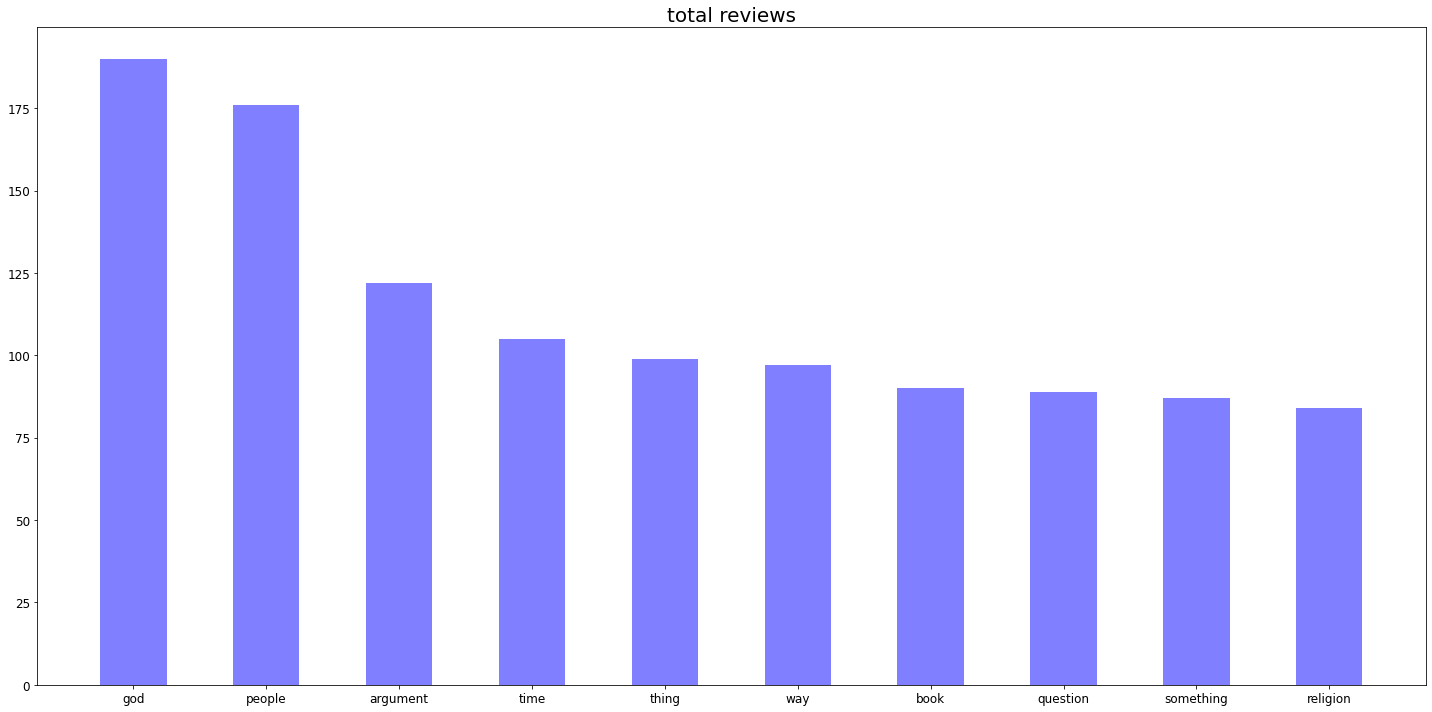

In [71]:
top_10 = c.most_common(k)
keys = [top_10[i][0] for i in range(len(top_10))]
values = [top_10[i][1] for i in range(len(top_10))]

plt.figure(figsize=(20, 10))
plt.title('total reviews', fontsize=20)
plt.bar(keys, values, width=0.5, color='b', alpha=0.5)
plt.tight_layout()
plt.show()
# save_fig('total reviews')

In [77]:
noun_text = ' '.join(final_NN_words)

그림 저장: wordcloud


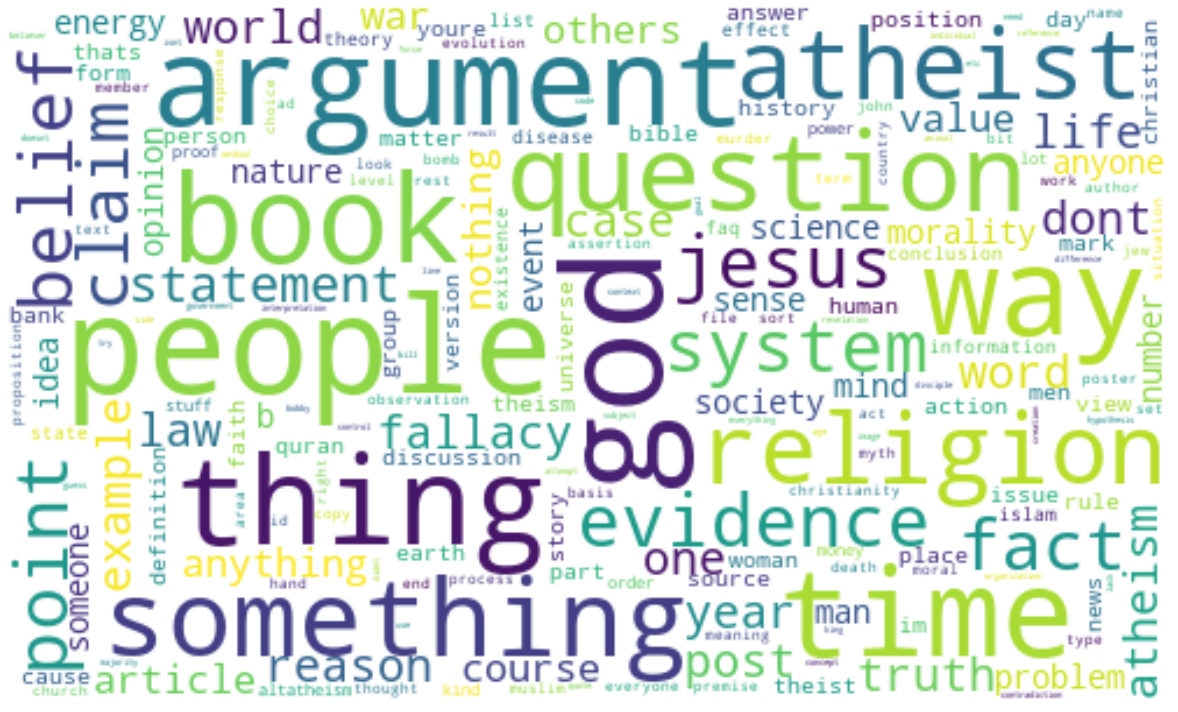

In [80]:
wordcloud = WordCloud(max_font_size=59, width=500, height=300, background_color='white', relative_scaling=.2).generate(noun_text)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# save_fig('wordcloud')

In [ ]:
# 그룹별 워드클라우드 추가